In [68]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import binom, norm, ttest_1samp, ttest_ind, ttest_rel, chi2, chisquare, chi2_contingency
from scipy.stats import f_oneway, kruskal, levene, shapiro, pearsonr, spearmanr
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

**Basic Data Exploration**

In [69]:
df = pd.read_csv('/content/Bank-Records.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.shape

(10000, 18)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## **Descriptive Statistics**

**Basic Statistics**

In [ ]:
columns = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']
statistics = pd.DataFrame({'Mean':df[columns].mean(),'Median':df[columns].median(),'Mode':df[columns].mode().iloc[0]})
statistics

,Mean,Median,Mode
CreditScore,650.528800,652.000,850.00
Age,38.921800,37.000,37.00
Balance,76485.889288,97198.540,0.00
NumOfProducts,1.530200,1.000,1.00
EstimatedSalary,100090.239881,100193.915,24924.92
Point Earned,606.515100,605.000,408.00


**Distribution Analysis**

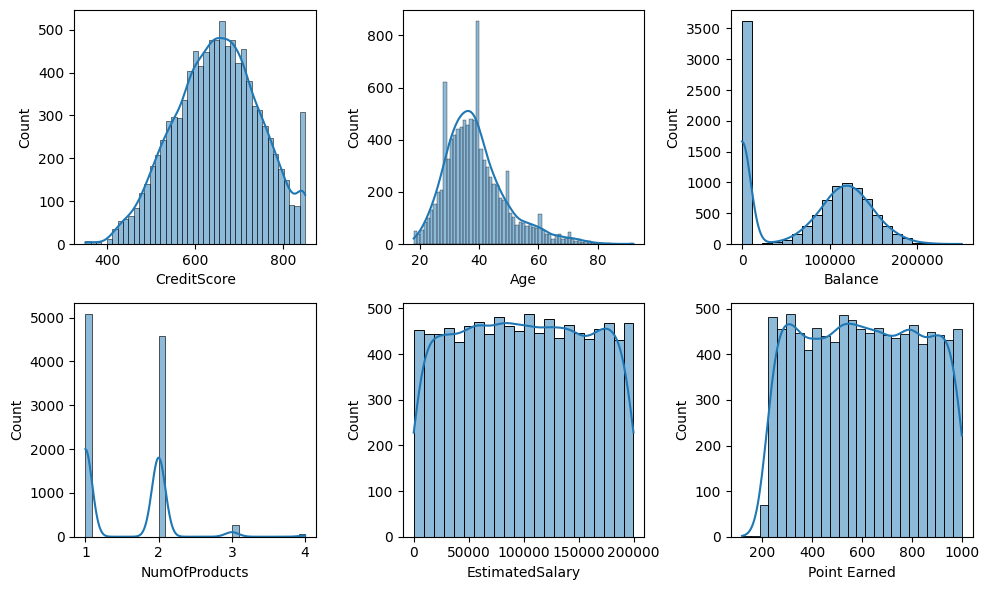

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
sns.histplot(data = df['CreditScore'],kde=True)
plt.subplot(2,3,2)
sns.histplot(data = df['Age'],kde=True)
plt.subplot(2,3,3)
sns.histplot(data = df['Balance'],kde=True)
plt.subplot(2,3,4)
sns.histplot(data = df['NumOfProducts'],kde=True)
plt.subplot(2,3,5)
sns.histplot(data = df['EstimatedSalary'],kde=True)
plt.subplot(2,3,6)
sns.histplot(data = df['Point Earned'],kde=True)
plt.tight_layout()
plt.show()


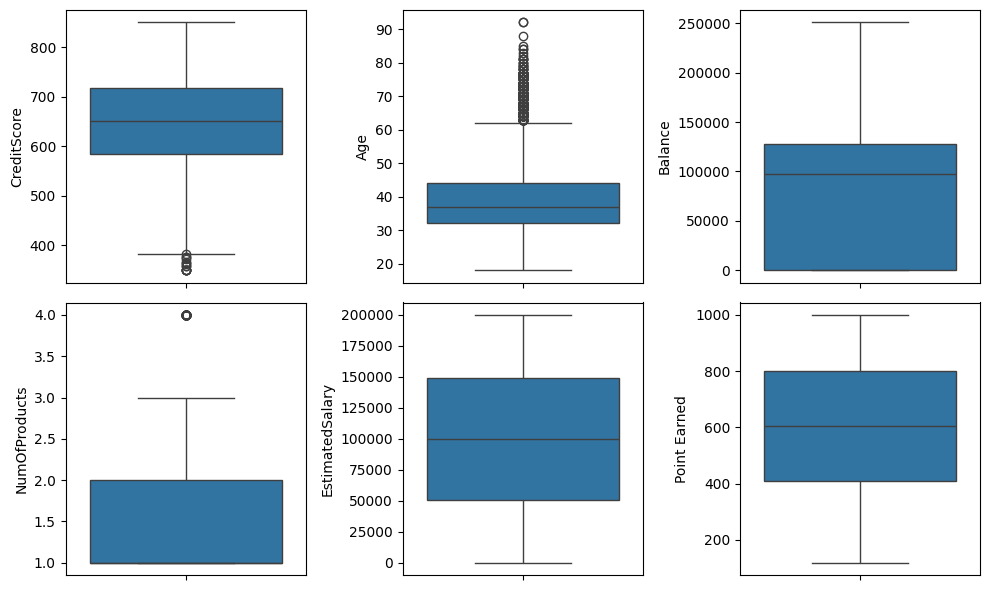

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
sns.boxplot(data = df['CreditScore'])
plt.subplot(2,3,2)
sns.boxplot(data = df['Age'])
plt.subplot(2,3,3)
sns.boxplot(data = df['Balance'])
plt.subplot(2,3,4)
sns.boxplot(data = df['NumOfProducts'])
plt.subplot(2,3,5)
sns.boxplot(data = df['EstimatedSalary'])
plt.subplot(2,3,6)
sns.boxplot(data = df['Point Earned'])
plt.tight_layout()
plt.show()


**Insights:**
*  Distribution of credit score is normal but possibly skewed to the right.This suggests that most people have credit scores in the middle range, but there are also a significant number of people with high credit scores.
*  Distribution of Age groups have a large no of outliers dividing the bank customers in two age groups
*  Distribution of balance appears to be right skewed and has high outliers showing customers with high bank bakance
*  Distribution of estimated salary shows that there are few customers with very high salaries
*  Distribution of Points earned is appears that most people have earned a low or moderate number of points




# **Exploratory Data Analysis (EDA)**

**Correlation Analysis**

In [ ]:
df[columns+['Exited']].corr(method='pearson')

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,Point Earned,Exited
CreditScore,1.000000,-0.003965,0.006268,0.012238,-0.001384,0.000077,-0.026771
Age,-0.003965,1.000000,0.028308,-0.030680,-0.007201,0.002222,0.285296
Balance,0.006268,0.028308,1.000000,-0.304180,0.012797,0.014608,0.118577
NumOfProducts,0.012238,-0.030680,-0.304180,1.000000,0.014204,-0.015330,-0.047611
EstimatedSalary,-0.001384,-0.007201,0.012797,0.014204,1.000000,-0.001515,0.012490
Point Earned,0.000077,0.002222,0.014608,-0.015330,-0.001515,1.000000,-0.004628
Exited,-0.026771,0.285296,0.118577,-0.047611,0.012490,-0.004628,1.000000


<Axes: >

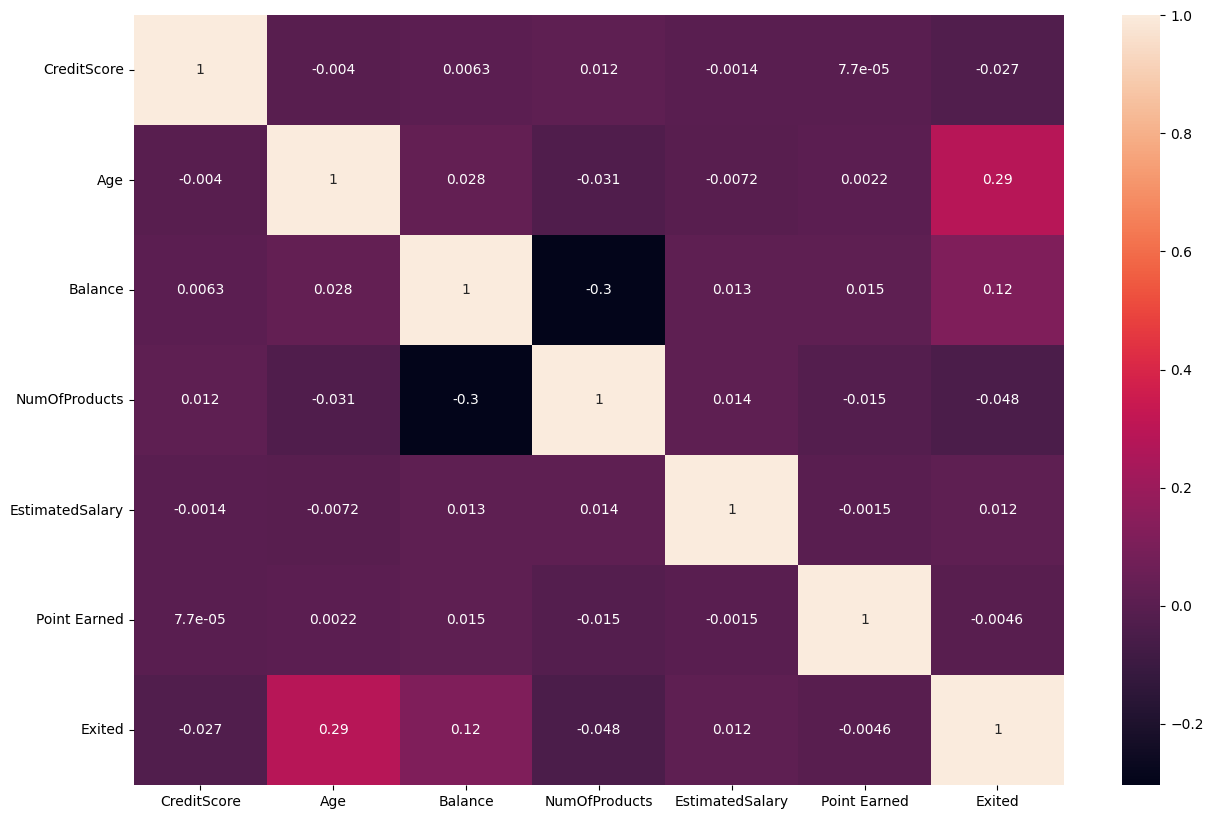

In [ ]:
sns.heatmap(df[columns+['Exited']].corr(method='pearson'),annot=True)

**Insights and Recommendations**
*  The strongest positive correlation appears to be between Exited and Age (0.29). This means that there is a weak positive correlation between these two variables. As age increases, the likelihood of exiting appears to also increase slightly
*  There appears to be a negative correlation between CreditScore and Exited (-0.027). This means there is a weak negative correlation between these two variables. People with higher credit scores are slightly less likely to exit
*  There appears to be a weak positive correlation between EstimatedSalary and Exited (0.012). This means there is a weak positive correlation between these two variables. People with higher estimated salaries are slightly more likely to exit



**Customer Profile Analysis**

Segment customers based on key demographics (Age, Geography, Gender) to identify which groups are more likely to churn.

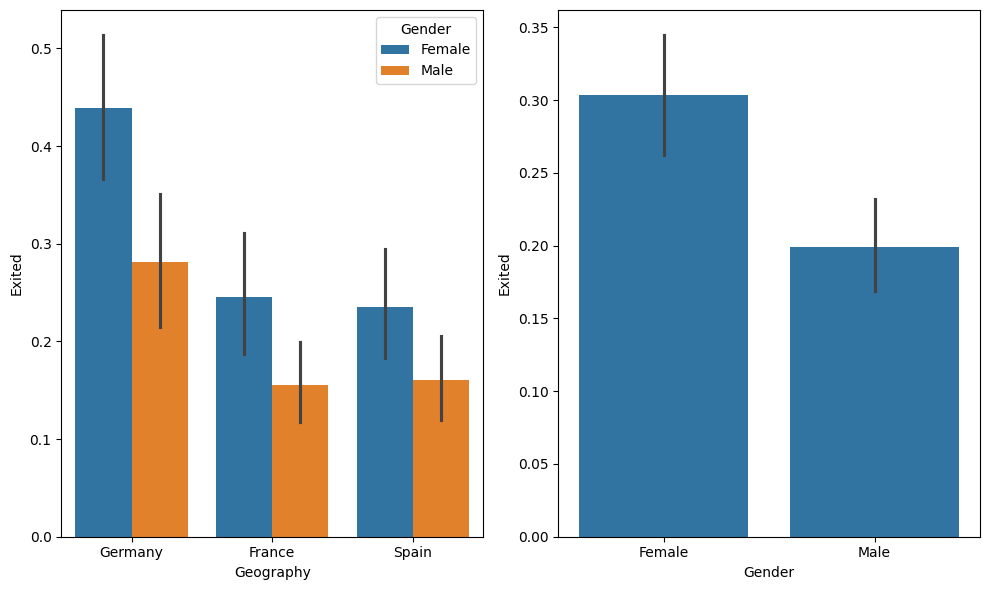

In [ ]:
x = df.groupby(['Age', 'Geography', 'Gender'])['Exited'].mean().reset_index().sort_values(by='Exited', ascending=False)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(data=x,x='Geography',y='Exited',hue='Gender')
plt.subplot(1,2,2)
sns.barplot(data=x,x='Gender',y='Exited')
plt.tight_layout()
plt.show()

In [ ]:
columns = ['Gender','Age','Geography']
for i in columns:
  x= df.groupby(i)['Exited'].mean().reset_index()
  print(x)

   Gender    Exited
0  Female  0.250715
1    Male  0.164743
    Age    Exited
0    18  0.090909
1    19  0.037037
2    20  0.050000
3    21  0.056604
4    22  0.142857
..  ...       ...
65   83  0.000000
66   84  0.500000
67   85  0.000000
68   88  0.000000
69   92  0.000000

[70 rows x 2 columns]
  Geography    Exited
0    France  0.161747
1   Germany  0.324432
2     Spain  0.166734


**Insights and Recommendations**
*  Considering all the geographic variables female customers have higher churn rate than males
*   Customers of both male and female have higher churn rates for Germany in compared to other two countries



# **Comparative Analysis**

**Churn by Geography**

<Axes: xlabel='Geography', ylabel='Exited'>

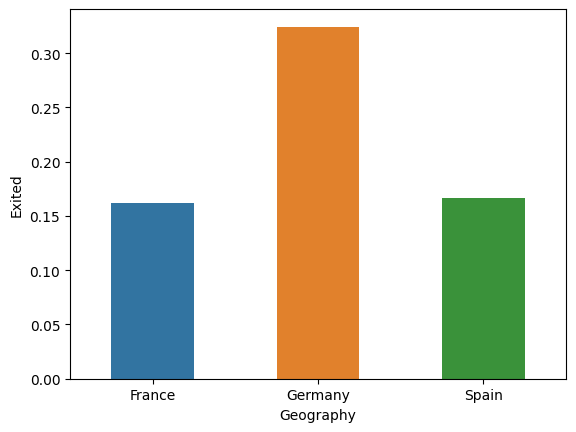

In [70]:
geography = df.groupby('Geography')['Exited'].mean().reset_index()
sns.barplot(data=geography,x='Geography',y='Exited',hue='Geography',width =0.5)

**Insights and Recommendations**

*   Customers have higher churn rates for Germany in compared to other two countries

**Gender Differences in Churn**

<Axes: xlabel='Gender', ylabel='Exited'>

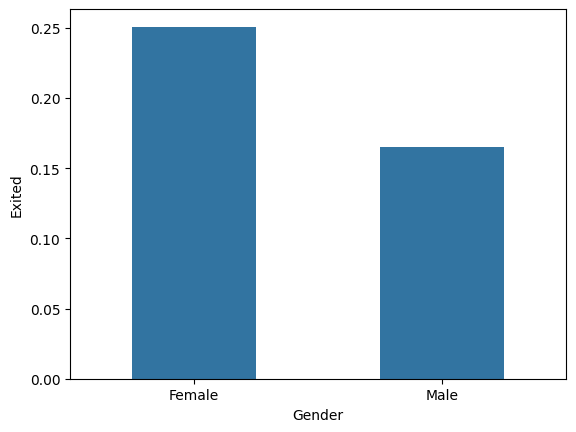

In [71]:
Gender = df.groupby('Gender')['Exited'].mean().reset_index()
sns.barplot(data=Gender,x='Gender',y='Exited',width =0.5)

**Insights and Recommendations:**
*  Females customers have higher churn rates than men
*  It indicates employement dropouts or other factors leading to churn




# **Behavioral Analysis**

**Product and Services Usage**

In [79]:
Ho = 'No of Products have no significance on churn rate'
Ha = 'No of Products has significance on churn rate'
alpha = 0.05
x = pd.crosstab(df['NumOfProducts'], df['Exited'])
chi2, pvalue, dof, expected = chi2_contingency(x)
if pvalue < alpha :
  print(pvalue)
  print('Reject Null Hypothesis')
  print(Ha)
else :
  print(pvalue)
  print('Fail to Reject Null Hypothesis')
  print(Ho)

0.0
Reject Null Hypothesis
No of Products has significance on churn rate


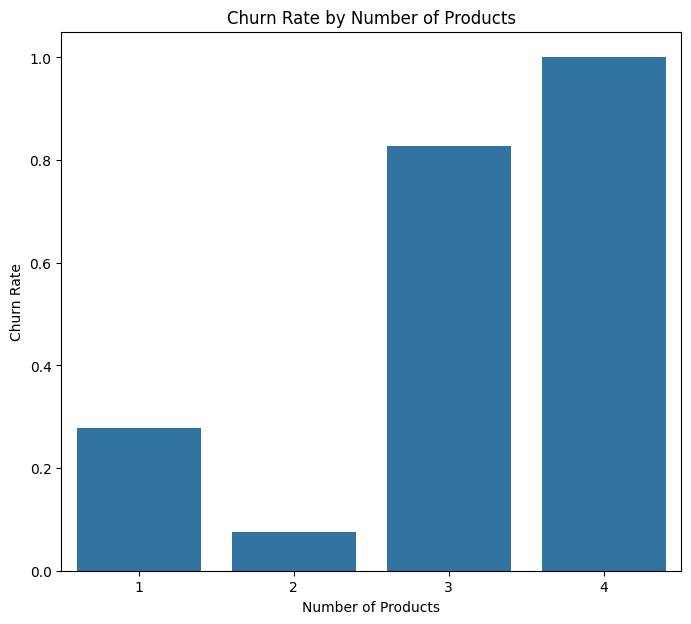

In [ ]:
plt.rcParams['figure.figsize'] = [8,7]

# Calculate the churn rate for each number of products
churn_rate_by_products = df.groupby('NumOfProducts')['Exited'].mean().reset_index()

# Bar plot for churn rate by number of products
sns.barplot(data=churn_rate_by_products, x='NumOfProducts', y='Exited')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.show()

**Recommendations and Insights**
*  Customers who use few products might be less engaged and more likely to churn.
*   Customers with many products might be overwhelmed or find it difficult to manage, leading to churn
*  Regularly monitor churn rates across different product usage segments



**Activity Level Analysis**

In [ ]:
df.groupby('IsActiveMember')['Exited'].mean()

IsActiveMember
0    0.268715
1    0.142691
Name: Exited, dtype: float64

In [ ]:
Ho = 'No significant difference in churn rate between active and no active users'
Ha = 'significant difference in churn rate between active and no active users'
alpha  = 0.01
active = df[df['IsActiveMember']==1]['Exited'].mean()
inactive = df[df['IsActiveMember']==0]['Exited'].mean()
contingency_Table = pd.crosstab(df['IsActiveMember'],df['Exited'])
chi2, pvalue, dof, expected = chi2_contingency(contingency_Table)
if pvalue < alpha :
  print(pvalue)
  print('Reject Null Hypothesis')
  print(Ha)
else :
  print(pvalue)
  print('Fail to Reject Null Hypothesis')
  print(Ho)

6.153167438113408e-55
Reject Null Hypothesis
significant difference in churn rate between active and no active users


<Axes: xlabel='IsActiveMember', ylabel='Exited'>

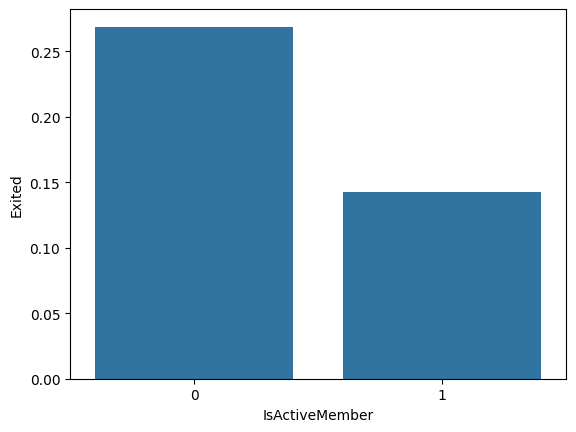

In [ ]:
x = df.groupby('IsActiveMember')['Exited'].mean().reset_index()
sns.barplot(data = x, x= 'IsActiveMember',y = 'Exited')

**Recommendations and Insights:**
*   Design special offers or incentives (discounts, free trials) to entice inactive users to return and re-engage with your product/service
*   Analyze if new users are not finding value quickly enough
*  reminding inactive users of the product's value and benefits.



# **Financial Analysis**

**Balance vs Churn**

In [ ]:
Ho = 'There is no significant diiference in balance between non churned and churned cusomers'
Ha = 'There is significant diiference in balance between non churned and churned cusomers'
Churned_customer_Balance = df[df['Exited'] == 1]['Balance']
Unchurned_customer_Balance = df[df['Exited']==0]['Balance']
alpha = 0.05
statistic, p_value = ttest_ind(Churned_customer_Balance,Unchurned_customer_Balance)
if p_value < alpha :
  print(p_value)
  print('Reject Null Hypothesis')
  print(Ha)
else:
  print(p_value)
  print('Fail to reject Null Hypothesis')
  print(Ho)

1.2092076077156017e-32
Reject Null Hypothesis
There is significant diiference in balance between non churned and churned cusomers


<Axes: xlabel='Exited', ylabel='Balance'>

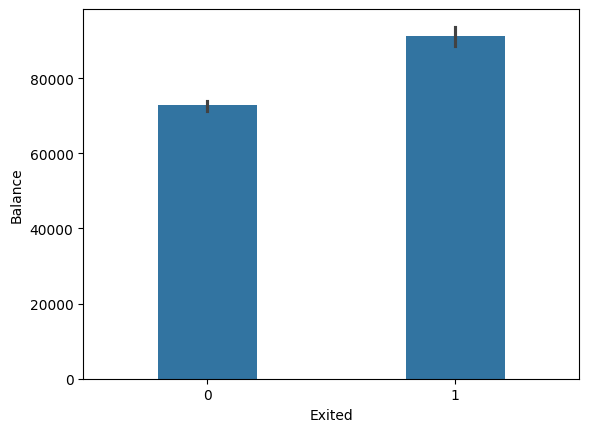

In [73]:
sns.barplot(data = df, x = 'Exited',y='Balance',width =0.4)

**Recommendations and Insights:**
*  Reach out to high-balance customers with personalized communication highlighting the full value proposition of your product/service.
*  Ensure a smooth and user-friendly experience for managing high-balance accounts

**Credit Card Ownership**

In [ ]:
churn_rate_card = df[df['HasCrCard']==1]['Exited'].mean()
churn_rate_nocard = df[df['HasCrCard']==0]['Exited'].mean()
Ho = 'There is no significant impact of a credit card on churn rate'
Ha = 'There is significant impact of a credit card on churn rate '
alpha = 0.05
churn_table = pd.crosstab(df['HasCrCard'],df['Exited'])
chi2, pvalue, dof, expected = chi2_contingency(churn_table)
if pvalue < alpha:
  print(pvalue)
  print(Ha)
  print('Reject Null Hypothesis')
  print(churn_rate_card)
  print(churn_rate_nocard)
else:
  print(pvalue)
  print(Ho)
  print('Fail to Reject Null Hypothesis')
  print(churn_rate_card)
  print(churn_rate_nocard)


0.5026181509009862
There is no significant impact of a credit card on churn rate
Fail to Reject Null Hypothesis
0.20198440822111977
0.20814940577249574


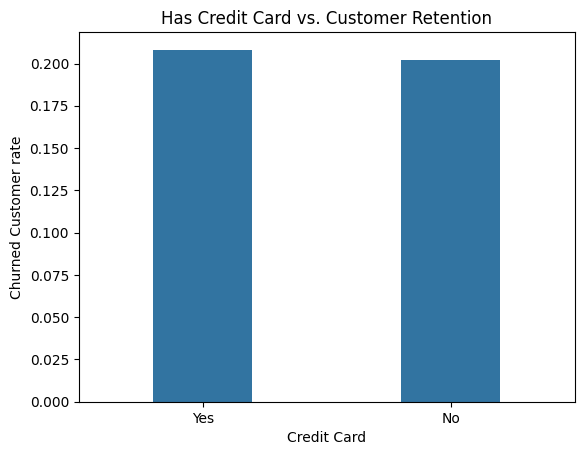

In [84]:
churn_rates = df.groupby('HasCrCard')['Exited'].mean().reset_index()
sns.barplot(data = churn_rates,x = 'HasCrCard', y='Exited',width = 0.4)
plt.title('Has Credit Card vs. Customer Retention')
plt.xlabel('Credit Card')
plt.ylabel('Churned Customer rate')
plt.xticks([0, 1], ['Yes', 'No'])
plt.show()

**Recommendations and Insights:**
*  There is no siognificant impact of credit card usage on churn rate

# **Customer Satisfaction and Feedback**

**Complaint Analysis**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
Complain_Churn = df[df['Complain']==1]['Exited'].mean()
NoComplain_Churn = df[df['Complain']==0]['Exited'].mean()
Ho = 'There is no significant impact of customers having complaints on churn rate of customers'
Ha = 'There is significant impact of customers having complaints on churn rate of customers'
alpha = 0.05
Churn_contingency = pd.crosstab(df['Complain'],df['Exited'])
chi2, pvalue, dof, expected = chi2_contingency(Churn_contingency)
if pvalue < alpha:
  print(pvalue)
  print(Ha)
  print('Reject Null Hypothesis')
  print(Complain_Churn)
  print(NoComplain_Churn)
else:
  print(pvalue)
  print(Ho)
  print('Fail to Reject Null Hypothesis')
  print(Complain_Churn)
  print(NoComplain_Churn)

0.0
There is significant impact of customers having complaints on churn rate of customers
Reject Null Hypothesis
0.9951076320939335
0.0005027652086475615


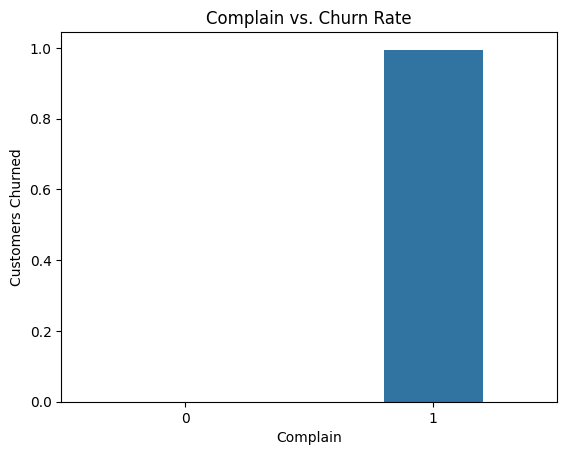

In [82]:
sns.barplot(x='Complain', y='Exited', data=df, ci=None,width = 0.4)
plt.title('Complain vs. Churn Rate')
plt.xlabel('Complain')
plt.ylabel('Customers Churned')
plt.show()

**Recommendations:**
*  Analyze the nature of customer complaints. Are they recurring issues, product bugs, service-related problems, or billing errors? Categorizing complaints will help identify areas for improvement
*  Make it easy for customers to lodge complaints through various channels
*  Train your customer service representatives to handle complaints with empathy and understanding
*  Regularly collect customer feedback through surveys to gauge satisfaction and identify areas for improvement beyond complaints

**Satisfaction and Churn**

In [7]:
df_complain = df[df['Complain']==1]
churn_complained = df_complain[df_complain['Exited']==1]['Satisfaction Score']
unchurned_complained = df_complain[df_complain['Exited']==0]['Satisfaction Score']

0       2
2       3
5       5
7       2
22      2
       ..
9981    3
9982    4
9991    3
9997    3
9998    2
Name: Satisfaction Score, Length: 2034, dtype: int64

In [17]:
churned = df[df['Exited'] == 1]['Satisfaction Score']
non_churned = df[df['Exited'] == 0]['Satisfaction Score']
Ho = 'There is no significant difference in the satisfaction scores between churned and non-churned customers who have filed complaints'
Ha = 'There is significant difference in the satisfaction scores between churned and non-churned customers who have filed complaints'
alpha = 0.05
t_stat, p_value = ttest_ind(churned, non_churned)
if p_value < alpha:
  print(p_value)
  print(Ha)
  print('Reject null Hypothesis')
else :
  print(p_value)
  print(Ho)
  print('Fail to reject null Hypothesis')


0.5586474054221244
There is no significant difference in the satisfaction scores between churned and non-churned customers who have filed complaints
Fail to reject null Hypothesis


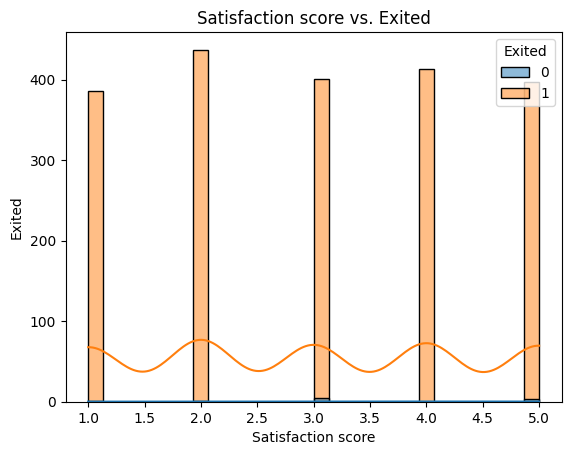

In [81]:
sns.histplot(data = df_complain,x='Satisfaction Score', hue='Exited', kde=True, bins=30)
plt.title('Satisfaction score vs. Exited')
plt.xlabel('Satisfaction score')
plt.ylabel('Exited')
plt.show()

**Recommendations and Insights:**
*  There is no significant effect of satisfactory score on churn rate which may infer wrong feedback from customers

# **Card Usage Analysis**

**Impact of Card Type on Churn**

In [35]:
H0 = 'Credit Card type has no significicant effect on churn rate of customers'
Ha = 'Credit Card type has significicant effect on churn rate of customers'
alpha = 0.05
churn_table = pd.crosstab(df['Card Type'],df['Exited'])
chi2, pvalue, dof, expected = chi2_contingency(churn_table)
if pvalue < alpha:
  print(pvalue)
  print(Ha)
  print('Reject null Hypothesis')
else :
  print(pvalue)
  print(Ho)
  print('Fail to reject null Hypothesis')

0.16794112067810177
There is no significant difference in the satisfaction scores between churned and non-churned customers who have filed complaints
Fail to reject null Hypothesis


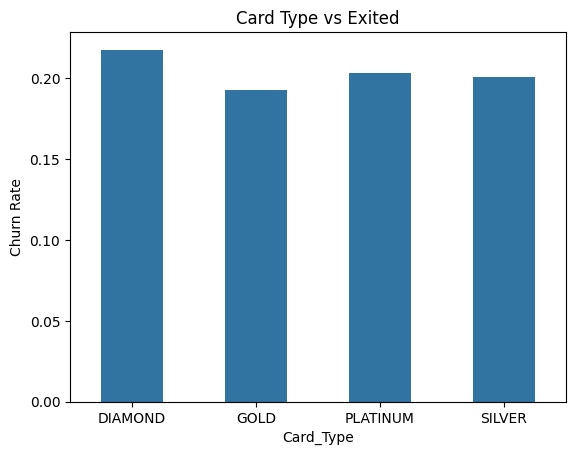

In [80]:
churn_cardtype = df.groupby('Card Type')['Exited'].mean().reset_index()
churn_cardtype.columns = ['Card_Type', 'Churn_Rate']
churn_cardtype
sns.barplot(data = churn_cardtype,x='Card_Type',y='Churn_Rate',width = 0.5)
plt.title('Card Type vs Exited')
plt.ylabel('Churn Rate')
plt.show()

**Loyalty Points Analysis**

In [54]:
retained_points = df[df['Exited'] == 0]['Point Earned']
exited_points = df[df['Exited'] == 1]['Point Earned']

mean_retained_points = retained_points.mean()
median_retained_points = retained_points.median()

mean_exited_points = exited_points.mean()
median_exited_points = exited_points.median()

print("Retained Customers")
print(f"Mean Points Earned: {mean_retained_points:.2f}")
print(f"Median Points Earned: {median_retained_points}")

print("\nExited Customers")
print(f"Mean Points Earned: {mean_exited_points:.2f}")
print(f"Median Points Earned: {median_exited_points}")

Retained Customers
Mean Points Earned: 607.04
Median Points Earned: 603.0

Exited Customers
Mean Points Earned: 604.45
Median Points Earned: 610.5


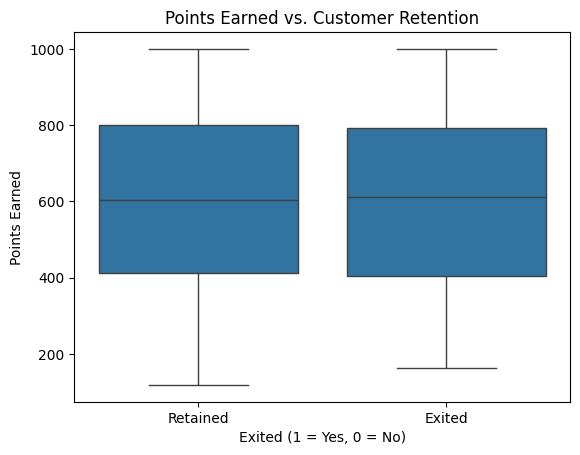

In [51]:
sns.boxplot(x='Exited', y='Point Earned', data=df)
plt.title('Points Earned vs. Customer Retention')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Points Earned')
plt.xticks([0, 1], ['Retained', 'Exited'])
plt.show()

In [57]:
Ho = 'There is no significant difference in loyalty points earned between retained and exited customers'
Ha = 'There is significant difference in loyalty points earned between retained and exited customers'
alpha = 0.05
RetainedCustomer_points = df[df['Exited'] == 0]['Point Earned']
ExitedCustomer_points = df[df['Exited'] == 1]['Point Earned']
statistic,pvalue = ttest_ind(RetainedCustomer_points,ExitedCustomer_points)
if pvalue < alpha:
  print(pvalue)
  print(Ha)
  print('Reject null Hypothesis')
else :
  print(pvalue)
  print(Ho)
  print('Fail to reject null Hypothesis')

0.6435350184288993
There is no significant difference in loyalty points earned between retained and exited customers
Fail to reject null Hypothesis


# **Salary Analysis**

**Salary and Churn**

In [62]:
df.groupby('Exited')['EstimatedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7962.0,99726.853141,57399.956717,90.07,50783.295,99620.355,148602.4450,199992.48
1,2038.0,101509.908783,57932.623392,11.58,51924.020,102489.335,152443.8575,199808.10


In [65]:
Salary_churned = df[df['Exited'] == 1]['EstimatedSalary']
Salary_Unchurned = df[df['Exited'] == 0]['EstimatedSalary']
Ho = 'There is no significant difference in Estimated salary of exited and retained customers'
Ha = 'There is significant difference in Estimated salary of exited and retained customers'
alpha = 0.05
statistic, pvalue = ttest_ind(Salary_churned,Salary_Unchurned)
if pvalue < alpha:
  print(pvalue)
  print(Ha)
  print('Reject null Hypothesis')
else :
  print(pvalue)
  print(Ho)
  print('Fail to reject null Hypothesis')

0.2117146135149097
There is no significant difference in Estimated salary of exited and retained customers
Fail to reject null Hypothesis


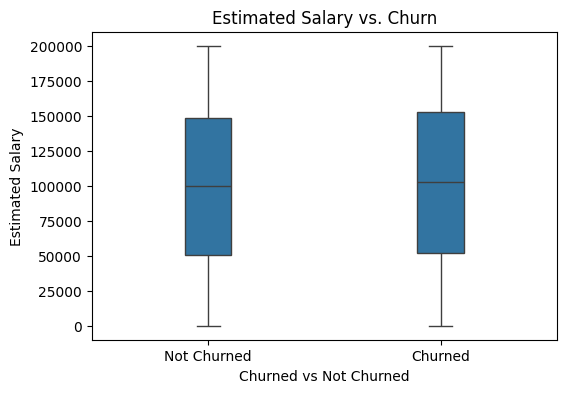

In [78]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df,width =0.2)
plt.title('Estimated Salary vs. Churn')
plt.xlabel('Churned vs Not Churned')
plt.ylabel('Estimated Salary')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

**Recommendations and insights:**
*  Instead of focusing on income, explore segmenting customers based on other factors that might influence churn
*  Analyze customer complaints to identify common themes
*   Analyze your competitors' offerings. What features or benefits do they provide that might be attracting customers who churn